In [1]:
import datetime
from pandas_datareader import data as web
import pandas as pd
import urllib2
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

In [2]:
#http://www.thealgoengineer.com/2014/download_sp500_data/
def scrape_list(site):
    hdr = {'User-Agent': 'Safari/9.1'}
    req = urllib2.Request(site, headers=hdr)
    page = urllib2.urlopen(req)
    soup = BeautifulSoup(page, "html.parser")

    table = soup.find('table', {'class': 'wikitable sortable'})
    sector_tickers = dict()
    for row in table.findAll('tr'):
        col = row.findAll('td')
        if len(col) > 0:
            sector = str(col[3].string.strip()).lower().replace(' ', '_')
            ticker = str(col[0].string.strip())
            if sector not in sector_tickers:
                sector_tickers[sector] = list()
            sector_tickers[sector].append(ticker)
    return sector_tickers

In [3]:
#Get list of s&p500 tickers from wikipedia
SITE = "http://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
sector_tickers = scrape_list(SITE)

In [4]:
print(np.transpose(sector_tickers["energy"]))
print(sector_tickers.keys())

['APC' 'APA' 'BHI' 'COG' 'CHK' 'CVX' 'XEC' 'CPGX' 'CXO' 'COP' 'DVN' 'DO'
 'EOG' 'EQT' 'XOM' 'FTI' 'HAL' 'HP' 'HES' 'KMI' 'MRO' 'MPC' 'MUR' 'NOV'
 'NFX' 'NBL' 'OXY' 'OKE' 'PSX' 'PXD' 'RRC' 'SLB' 'SWN' 'SE' 'TSO' 'RIG'
 'VLO' 'WMB']
['industrials', 'energy', 'consumer_discretionary', 'utilities', 'telecommunications_services', 'materials', 'health_care', 'consumer_staples', 'financials', 'information_technology']


In [5]:
start = datetime.datetime(2015, 1, 1)
end = datetime.datetime.today()
data = web.DataReader(sector_tickers["energy"], 'yahoo', start, end);
list(data)

['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close']

In [6]:
#data["GE"].reset_index()['Date']

In [35]:
#Isolate Adjusted Close values (typically used for correlations) 
AC = data["Adj Close"]
AC.head()

,APA,APC,BHI,CHK,COG,COP,CPGX,CVX,CXO,DO,...,RIG,RRC,SE,SLB,SWN,TSO,VLO,WMB,XEC,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,62.232933,80.961891,55.307522,19.546924,29.979794,65.126021,NaN,106.347021,101.010002,36.572098,...,17.775706,55.125845,34.549035,82.995461,27.170000,73.579466,48.500956,40.977394,106.073512,88.943918
2015-01-05,58.411012,74.576637,54.313032,18.290618,28.336384,62.026583,NaN,102.096163,96.110001,33.389355,...,16.520026,51.702866,32.873357,80.747889,26.010000,70.226969,46.506579,39.355334,99.930225,86.510248
2015-01-06,57.777274,74.025670,54.145644,17.796010,27.937980,59.465767,NaN,102.048928,94.180000,33.330414,...,16.147245,50.339647,31.941382,79.168779,24.709999,69.983328,45.938133,38.820689,98.173577,86.050338
2015-01-07,57.133788,75.206308,55.602918,17.736658,28.177023,59.862644,NaN,101.963914,91.989998,32.691898,...,15.990286,48.876920,31.950795,79.159089,24.240000,68.813856,45.581651,38.612268,97.339919,86.922247
2015-01-08,59.346991,77.636444,56.154317,18.211481,28.744746,61.355669,NaN,104.297164,96.400002,32.367732,...,15.960857,49.802318,32.139074,80.118180,25.070000,72.380751,48.192647,38.983801,99.771429,88.369037


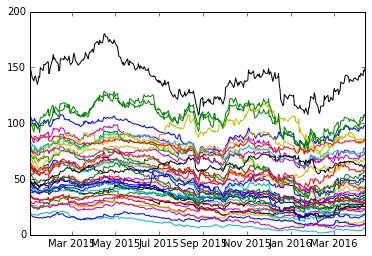

In [8]:
#A messy plot of all the adjusted closing prices
%matplotlib inline
plt.plot(AC);

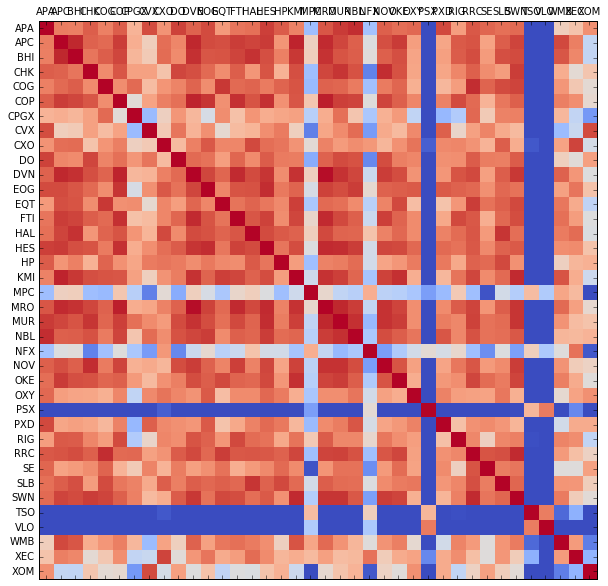

In [10]:
#get correlations and plot matrix as a heatmap
ACcorr = AC.corr()
size = 10
fig, ax = plt.subplots(figsize=(size, size))
ax.matshow(ACcorr,cmap=cm.get_cmap('coolwarm'), vmin=0,vmax=1)
plt.xticks(range(len(ACcorr.columns)), ACcorr.columns);
plt.yticks(range(len(ACcorr.columns)), ACcorr.columns);

In [90]:
#Get highest correlations in matrix and plot a sample
thresh = 0.93
mask = ACcorr > thresh
i,j = np.where(ACcorr > thresh)   #row,column coords
print str(i.shape[0]/float(ACcorr.shape[0]**2 - ACcorr.shape[0]))+' of stock pairs have a correlation > '+str(thresh)

0.108108108108 of stock pairs have a correlation > 0.93


In [77]:
mask.head()

,APA,APC,BHI,CHK,COG,COP,CPGX,CVX,CXO,DO,...,RIG,RRC,SE,SLB,SWN,TSO,VLO,WMB,XEC,XOM
APA,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
APC,False,True,True,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
BHI,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
CHK,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
COG,False,False,False,False,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False


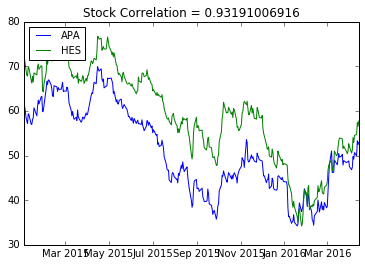

In [78]:
#Plot a sample correlation
stocks = ACcorr.columns
index = 1
x = stocks[i[index]]
y = stocks[j[index]]
plt.plot(AC[x], label=x)
plt.plot(AC[y], label=y)
plt.title('Stock Correlation = '+str(ACcorr[x][y]))
plt.legend(loc='upper left',prop={'size':10})

### Clusters of Correlation
The next step is to look for clusters of correlations within a sector